<img style="float: left; margin: 30px 15px 15px 15px;" src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg" width="500" height="250" /> 
    
    
# <font color='navy'> Information-based Models

<font color='black'>

- Luis Fernando Márquez Bañuelos

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
def erlang(lam: int, k: int, S0: np.ndarray) -> np.ndarray:
    return lam**k * S0**(k-1) * np.exp(-lam*S0) / math.factorial(k-1)

def pi_lb(spread: np.ndarray) -> np.ndarray:
    p = 0.5 - 0.08 * spread
    return np.maximum(p, 0)

## <font color='cornflowerblue'> Plot Price Distribution

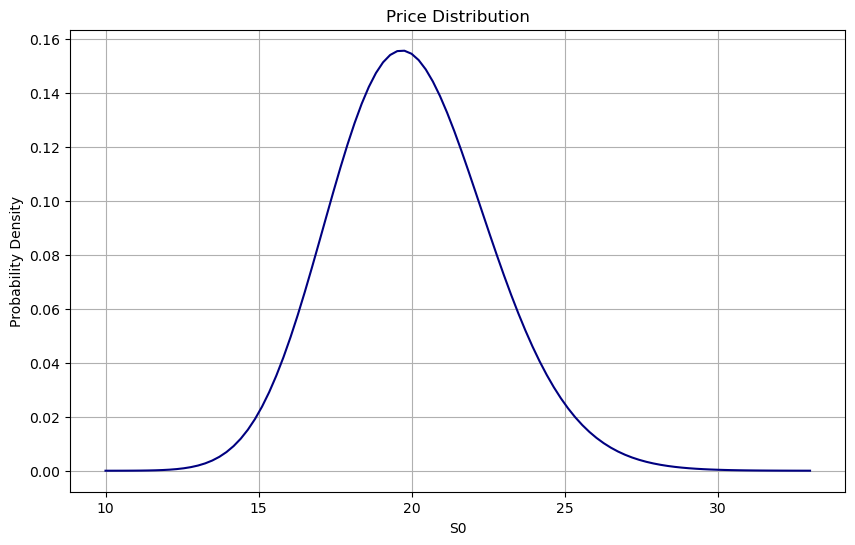

In [3]:
lam = 3
k = 60
S0 = np.linspace(10, 33, 100)
distr = erlang(lam, k, S0)

plt.figure(figsize=(10, 6))
plt.plot(S0, distr, c = 'navy')
plt.title("Price Distribution")
plt.xlabel("S0")
plt.ylabel("Probability Density")
plt.grid()
plt.show()

## <font color='cornflowerblue'> Expected Revenues

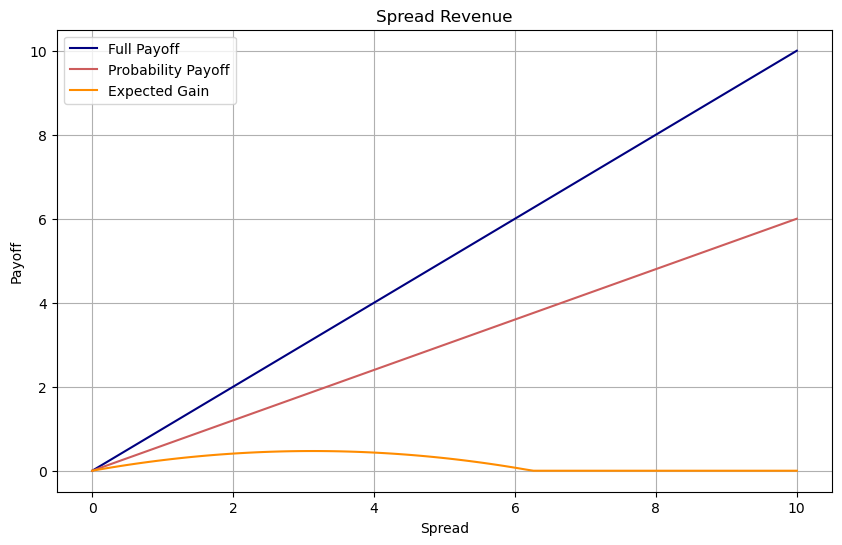

In [4]:
spread = np.linspace(0, 10, 100)
expected_gain = pi_lb(spread) * 0.6 * spread

plt.figure(figsize=(10, 6))
plt.plot(spread, spread, c = 'navy', label='Full Payoff')
plt.plot(spread, 0.6*spread, c = 'indianred', label='Probability Payoff')
plt.plot(spread, expected_gain, c = 'darkorange', label='Expected Gain')

plt.title("Spread Revenue")
plt.xlabel("Spread")
plt.ylabel("Payoff")
plt.legend()
plt.grid()
plt.show()